<a href="https://colab.research.google.com/github/younes-code/Fashion-MNIST-MLP/blob/main/TODO_CheckpointANN_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [39]:
from __future__ import print_function

import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


In [40]:
import keras
keras.__version__

'2.6.0'

# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [41]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
print("Number of train data - " + str(len(train_and_validation_images)))
print("Number of test data - " + str(len(test_images)))

Number of train data - 60000
Number of test data - 10000


In [43]:
print("train_and_validation_images shape:", train_and_validation_images.shape, "train_and_validation_labels shape:", train_and_validation_labels.shape)

train_and_validation_images shape: (60000, 28, 28) train_and_validation_labels shape: (60000,)


In [44]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [45]:
print("Number of train data - " + str(len(train_images)))
print("Number of train  data - " + str(len(validation_images)))

Number of train data - 50000
Number of train  data - 10000


In [46]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #indexes

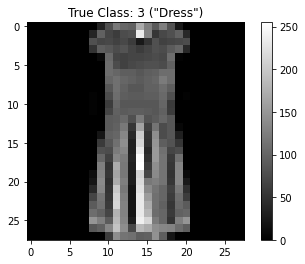

In [47]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)




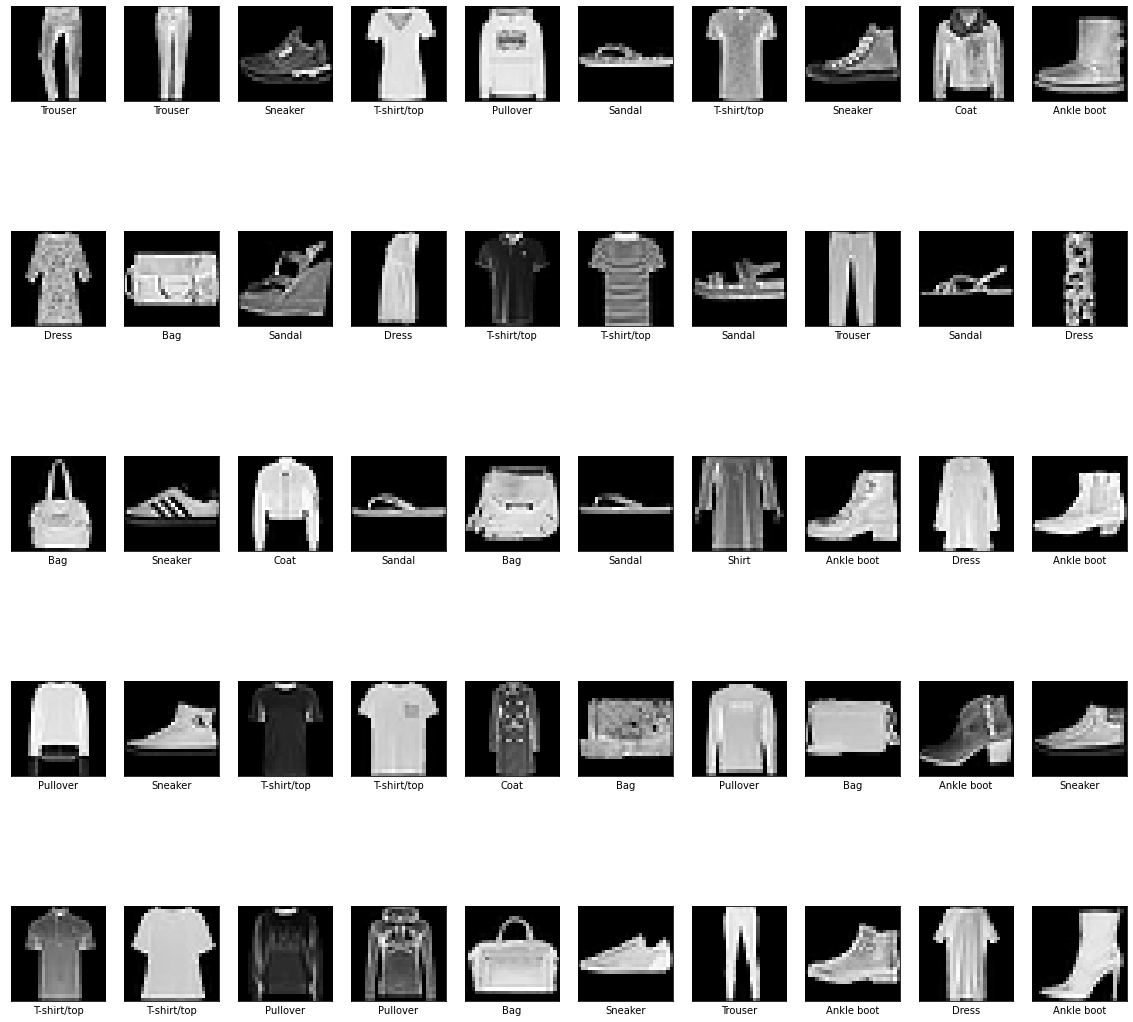

In [48]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
  
    text_description = train_labels[numerical_label]
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [49]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)


In [50]:
# Normalize

train_images_model = train_images_flatten/255.0
validation_images_model = validation_images_flatten/255.0
test_images_model = test_images_flatten/255.0


In [51]:
# convert class vectors to binary class matrices

train_labels_categ = tf.keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = tf.keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = tf.keras.utils.to_categorical(test_labels, 10)

# Train

In [75]:
batch_size = 128
num_classes = 10
epochs = 40

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        Dense(64, activation="relu", name="layer1", input_shape=(None,784)),
        Dense(32, activation="relu", name="layer2"),
        Dense(10,activation="softmax", name="layer3"),
    ]
)

model.summary()


# End Code

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, None, 64)          50240     
_________________________________________________________________
layer2 (Dense)               (None, None, 32)          2080      
_________________________________________________________________
layer3 (Dense)               (None, None, 10)          330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [77]:
from keras.callbacks import ModelCheckpoint

filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


history = model.fit(train_images_model, train_labels_categ,
                    validation_data=(validation_images_model,validation_labels_categ),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )


Epoch 1/40
391/391 [==============================] - 2s 3ms/step - loss: 0.6721 - accuracy: 0.7693 - val_loss: 0.5085 - val_accuracy: 0.8211
Epoch 2/40
391/391 [==============================] - 1s 3ms/step - loss: 0.4475 - accuracy: 0.8407 - val_loss: 0.4114 - val_accuracy: 0.8548
Epoch 3/40
391/391 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8555 - val_loss: 0.4161 - val_accuracy: 0.8560
Epoch 4/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8649 - val_loss: 0.4001 - val_accuracy: 0.8590
Epoch 5/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8733 - val_loss: 0.3745 - val_accuracy: 0.8655
Epoch 6/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8791 - val_loss: 0.3475 - val_accuracy: 0.8746
Epoch 7/40
391/391 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8836 - val_loss: 0.3674 - val_accuracy: 0.8698
Epoch 

# Test

In [78]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8762000203132629


In [79]:
test_logits = model.predict(test_images_flatten)

In [80]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
test_predictions = np.argmax(test_logits, axis=1)
print(test_predictions)

[9 2 1 ... 8 1 5]


In [82]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

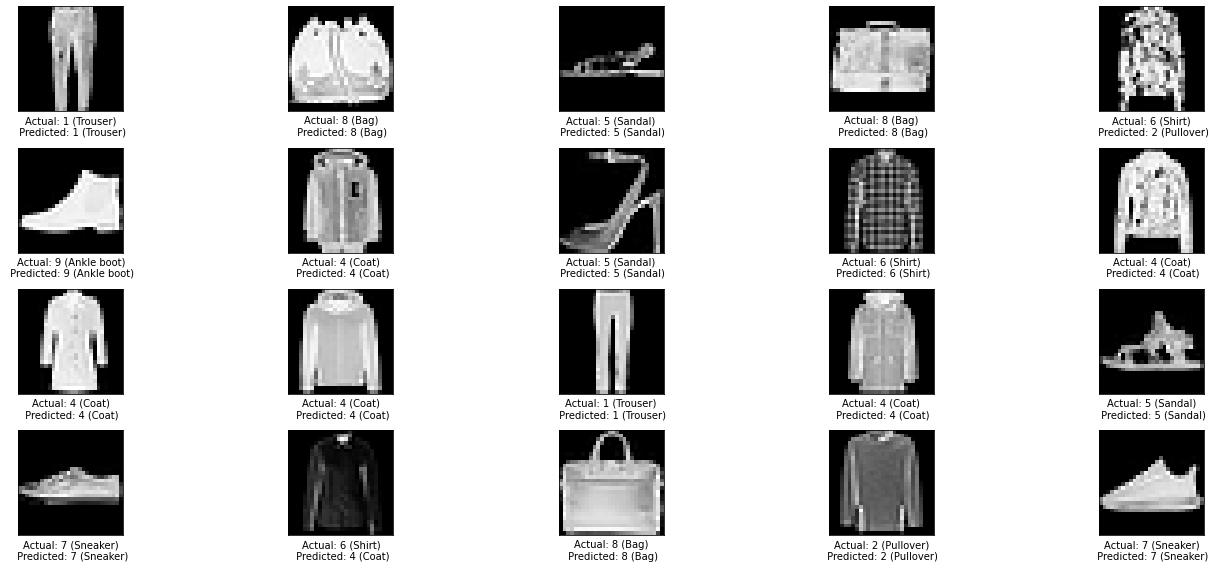

In [83]:
plt.figure(figsize=(20, 8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    index = np.random.randint(0, 10000)

    plt.imshow(test_images[index], cmap=plt.cm.gray)
    
  
    actual_label = np.argmax(test_labels_categ [index] )
    predicted_label = np.argmax(test_logits [index])
    

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
                                                actual_label, 
                                                text_labels[actual_label], 
                                                predicted_label, 
                                                text_labels[predicted_label],
                                            
    ))
    
plt.tight_layout()
plt.show()